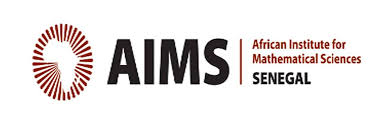

 <center><center>  <h1 style="color:brown;text-align:center;" > FINAL PROJECT 2 FOR DATA MINING </h1>
    <center><center>  <h3 style="color:brown;text-align:center;" > Partie de Prédiction </h3>
 
   <h2> <i> <p style="color:brown; text-align:center;"> Membres of Group: </p></i></h2>
    
<center><h4> Makumbu Mboko Henock </h4>
<center><h4> Amadou Aliou Ball </h4> 
<center><h4> Mariama Diarra Bousso Diop </h4>
<center><h4> Aissata Diop </h4> 
<center><h4> Mbingui Verlon Roel </h4>
<center><h4> Bahati Kilongo </h4> 

##  `Description Data set` 

Ce jeu de données est constitué de caractéristiques de chiffres manuscrits (0'--9’) extrait d’une collection de cartes d’utilité publique néerlandaises. Les modèles ont été numérisés en images binaire. Ces chiffres sont représentés par les six des ensembles de fonctionnalités suivantes :

                mfeat-fou: 76 Fourier coefficients of the character shapes;
                mfeat-fac: 216 profile correlations;
                mfeat-kar: 64 Karhunen-Love coefficients;
                mfeat-pix: 240 pixel averages in 2 x 3 windows;
                mfeat-zer: 47 Zernike moments;
                mfeat-mor: 6 morphological features.

##  `Définition du Problème à résoudre` 
L’objectif est de prédire les valeurs prises par une variable cible
qualitative nominale CLASS à 10 modalités.

Toutefois cette variable à expliquée n'est pas encore créée, nous allons dans un premier temps la créer. Ensuite utiliser certaines méthodes supervisée pour la prédiction

## `Importation des outils à utiliser`

In [48]:
import pandas as pd #

import os 
os.getcwd()
import seaborn as sns
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

import warnings
warnings.filterwarnings('ignore')

## `Importation des données`

Nous chargeons les données, chacune avec sa configuration particulière, donc la nomination des entêtes des différentes colonnes par la numérotation des suffixes  de chaque nom du fichier, pour ne pas confondre les variables de chaque fiechier

In [49]:
mfeat_fac = pd.read_table("mfeat-fac", header=None, sep='\s+' ,names=['fac_'+str(i) for i in range(216)])
mfeat_fou = pd.read_table("mfeat-fou", header=None, sep='\s+',names=['fou_'+str(i) for i in range(76)])
mfeat_kar = pd.read_table("mfeat-kar", header=None, sep='\s+',names=['kar_'+str(i) for i in range(64)])
mfeat_mor = pd.read_table("mfeat-mor", header=None, sep='\s+',names=['mor_'+str(i) for i in range(6)])
mfeat_pix = pd.read_table("mfeat-pix", header=None, sep='\s+',names=['pix_'+str(i) for i in range(240)])
mfeat_zer = pd.read_table("mfeat-zer", header=None, sep='\s+',names=['zer_'+str(i) for i in range(47)])

## `Préparation et Nettoyage des données`

### Concaténation des données importées

Dans le cadre de concision pour les raisons de traitement unique,  nous regroupons tous les fichiers par leurs  variables dans un dataframe nommé `data_full`.

In [50]:
#using methode de concat pour concaténation suivant les colones (axis = 1)
data_full = pd.concat([mfeat_fac,mfeat_fou,mfeat_kar,mfeat_mor,mfeat_pix ,mfeat_zer] ,axis = 1)

In [51]:
#Affichage de l'entête du data_full
data_full.head()

,fac_0,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,...,zer_37,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46
0,98,236,531,673,607,647,2,9,3,6,...,1.713529,33.810340,9.858915,1.399891,148.138058,326.239452,9.711070,20.007248,47.032578,539.208457
1,121,193,607,611,585,665,7,9,2,4,...,2.590208,35.400531,70.681899,6.674412,155.135985,377.832675,8.140633,44.536711,46.338954,518.496567
2,115,141,590,605,557,627,12,6,3,3,...,1.476285,19.477230,30.093590,7.858211,150.126419,419.565747,4.530921,26.292170,44.574822,549.912691
3,90,122,627,692,607,642,0,6,4,5,...,1.349613,14.179518,30.564085,7.097728,173.840759,441.350376,3.706023,13.432311,51.739930,574.887814
4,157,167,681,666,587,666,8,6,1,4,...,0.667971,8.705403,30.242473,9.015714,167.021185,332.479997,1.806273,23.689300,50.407770,492.227513


In [52]:
data_full.shape

(2000, 649)

In [53]:
# Affichage des informations générales du dataset (data_full) par la methode info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 649 entries, fac_0 to zer_46
dtypes: float64(193), int64(456)
memory usage: 9.9 MB


### Vérication des valeurs manquantes

In [54]:
# Vérification des valeurs manquantes
data_full.isnull().sum().sort_values(ascending = False)

fac_0     0
pix_84    0
pix_66    0
pix_67    0
pix_68    0
         ..
fou_2     0
fou_3     0
fou_4     0
fou_5     0
zer_46    0
Length: 649, dtype: int64

### Description statistique sur les variables

In [55]:
# Quelques statistiques sur les variables quantitatives
data_full.describe()

,fac_0,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,...,zer_37,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,272.051500,322.725500,774.82450,754.339000,640.460500,684.47200,19.450000,18.373000,15.359000,9.054000,...,3.846023,38.234141,111.894053,7.537383,185.346722,399.152215,9.206768,86.405616,54.625111,508.902572
std,91.275454,109.426588,140.14157,109.173768,48.940117,85.07886,11.351561,7.351795,8.887216,4.084412,...,2.473214,27.619617,65.211345,3.757990,37.878378,96.330148,6.780826,52.027535,11.190058,71.008030
min,67.000000,81.000000,500.00000,543.000000,437.000000,439.00000,0.000000,1.000000,0.000000,0.000000,...,0.073270,0.320603,1.107045,0.351190,57.557652,109.141060,0.362926,0.753130,19.956263,322.226686
25%,208.000000,247.000000,656.75000,667.000000,607.000000,642.00000,10.000000,13.000000,8.000000,5.000000,...,1.929376,19.130537,56.358750,5.031431,158.815192,329.825175,4.444497,40.332461,46.509687,455.272657
50%,274.500000,324.000000,766.00000,736.000000,636.500000,676.00000,20.000000,18.000000,15.000000,10.000000,...,3.257455,31.216666,108.315201,6.982853,184.453619,397.537857,7.417669,83.125987,54.120179,504.737620
75%,338.000000,406.000000,879.00000,830.000000,667.000000,716.00000,29.000000,24.000000,22.000000,12.000000,...,5.335209,48.414166,160.362336,9.394056,213.729648,459.781887,11.849198,127.611792,62.907443,558.841944
max,515.000000,565.000000,1264.00000,1134.000000,823.000000,1047.00000,42.000000,39.000000,39.000000,17.000000,...,12.379771,158.706121,291.114897,24.583822,296.803081,722.998115,39.049934,218.877200,89.229699,777.861827


### Normalisation du data_full

In [56]:
# on centre et réruit les données pour permettre que les données puissent avoir la même unité
data_mean=data_full.mean()
data_std=data_full.std()
data_scaling=(data_full-data_mean)/data_std

In [57]:
#affichage du nouveau data normalisé
data_scaling.head()

,fac_0,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,...,zer_37,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46
0,-1.906882,-0.792545,-1.739844,-0.745042,-0.683703,-0.440438,-1.537234,-1.274927,-1.390649,-0.747721,...,-0.862236,-0.160169,-1.564684,-1.633185,-0.982319,-0.756905,0.074372,-1.276216,-0.678507,0.426795
1,-1.654897,-1.185503,-1.197535,-1.312944,-1.133232,-0.228870,-1.096765,-1.274927,-1.503170,-1.237387,...,-0.507767,-0.102594,-0.631978,-0.229636,-0.797572,-0.221317,-0.157228,-0.804745,-0.740493,0.135111
2,-1.720632,-1.660707,-1.318841,-1.367902,-1.705360,-0.675514,-0.656297,-1.682990,-1.390649,-1.482221,...,-0.958162,-0.679116,-1.254390,0.085372,-0.929826,0.211912,-0.689569,-1.155416,-0.898144,0.577542
3,-1.994529,-1.834339,-1.054823,-0.571007,-0.683703,-0.499207,-1.713421,-1.682990,-1.278128,-0.992554,...,-1.009379,-0.870925,-1.247175,-0.116992,-0.303761,0.438058,-0.811221,-1.402590,-0.257834,0.929265
4,-1.260487,-1.423105,-0.669498,-0.809160,-1.092366,-0.217116,-1.008672,-1.682990,-1.615692,-1.237387,...,-1.284989,-1.069122,-1.252107,0.393383,-0.483799,-0.692122,-1.091386,-1.205445,-0.376883,-0.234833


In [58]:
# vérifcation de la taille de données
print("Le nombres total d'observations et de variables est :", data_full.shape)

Le nombres total d'observations et de variables est : (2000, 649)


### Construction de la variable Target

In [59]:
#Les 200 premiers modèles sont de classe '0', suivis d'ensembles de 200 modèles pour chacune des classes '1' - '9'
n=0
m=200
for i in range(10):
    if m<=2000:
        data_scaling.loc[n:m,'Target']=i
        
    n+=200
    m+=200
# Ici pour les données normalisées

In [60]:
#Les 200 premiers modèles sont de classe '0', suivis d'ensembles de 200 modèles pour chacune des classes '1' - '9'
n=0
m=200
for i in range(10):
    if m<=2000:
        data_full.loc[n:m,'Target']=i
        
    n+=200
    m+=200
# POur les données brutes

In [61]:
# Nous avons 200 chiffres dans chaque classe 
data_scaling['Target'].value_counts()

0.0    200
1.0    200
2.0    200
3.0    200
4.0    200
5.0    200
6.0    200
7.0    200
8.0    200
9.0    200
Name: Target, dtype: int64

In [62]:
data_scaling

,fac_0,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,...,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,Target
0,-1.906882,-0.792545,-1.739844,-0.745042,-0.683703,-0.440438,-1.537234,-1.274927,-1.390649,-0.747721,...,-0.160169,-1.564684,-1.633185,-0.982319,-0.756905,0.074372,-1.276216,-0.678507,0.426795,0.0
1,-1.654897,-1.185503,-1.197535,-1.312944,-1.133232,-0.228870,-1.096765,-1.274927,-1.503170,-1.237387,...,-0.102594,-0.631978,-0.229636,-0.797572,-0.221317,-0.157228,-0.804745,-0.740493,0.135111,0.0
2,-1.720632,-1.660707,-1.318841,-1.367902,-1.705360,-0.675514,-0.656297,-1.682990,-1.390649,-1.482221,...,-0.679116,-1.254390,0.085372,-0.929826,0.211912,-0.689569,-1.155416,-0.898144,0.577542,0.0
3,-1.994529,-1.834339,-1.054823,-0.571007,-0.683703,-0.499207,-1.713421,-1.682990,-1.278128,-0.992554,...,-0.870925,-1.247175,-0.116992,-0.303761,0.438058,-0.811221,-1.402590,-0.257834,0.929265,0.0
4,-1.260487,-1.423105,-0.669498,-0.809160,-1.092366,-0.217116,-1.008672,-1.682990,-1.615692,-1.237387,...,-1.069122,-1.252107,0.393383,-0.483799,-0.692122,-1.091386,-1.205445,-0.376883,-0.234833,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.350023,-0.737714,1.085870,-1.175548,-1.562328,-0.123086,0.488920,-0.186757,-1.728213,-0.502888,...,-0.041862,1.809260,-0.308779,-1.078341,-0.054765,-0.078787,1.275978,-0.988880,-0.103721,9.0
1996,0.569140,0.066478,1.028785,-0.378653,-0.642837,0.100236,0.753200,-0.322778,-0.828043,-0.013221,...,-1.090227,1.731325,-0.067873,0.052504,-0.474398,-1.152910,1.447529,-0.062810,-0.372834,9.0
1997,0.711566,-0.216817,0.550697,-0.277896,-1.214964,-0.287639,0.224639,-0.594821,-0.603001,0.231612,...,-0.543326,0.169873,-0.342529,-1.610651,-0.410744,-0.672949,0.289586,-1.573826,-1.103512,9.0
1998,-0.274460,-0.564081,0.650596,-1.111430,-1.541895,-0.816560,0.400826,-0.458799,-1.503170,-1.237387,...,1.144098,0.974136,-1.057371,-1.195390,0.908713,1.017944,0.774183,-1.203794,0.880515,9.0


## `Analyse et Exploration` 

<AxesSubplot:xlabel='Target', ylabel='Density'>

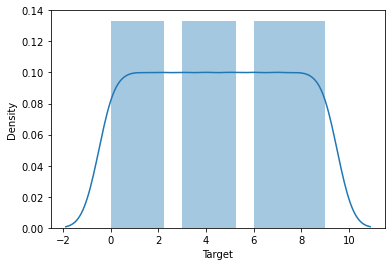

In [63]:
sns.distplot(data_scaling['Target'])

Partant de ce graphe , nous observons  que les donnéees sont proportionnelles. Donc Les classes sont équilibrées

### Tendance uniforme de la moyenne des classes

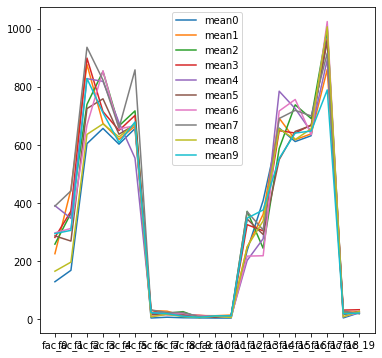

In [64]:
plt.figure(1,figsize=(6,6))
for i in range(10):
    plt.plot(data_full[data_full['Target']==i].describe().T['mean'].head(20), label=('mean{}'.format(i)))
    plt.legend()

les courbes de la moyenne de chaque classe ont la même  allure, ce qui explique la ressemblance des classes
en termes de nombre d'individus 

### Etude de correlation entre variables

In [65]:
correlation = data_full.corr().round(1)
correlation

,fac_0,fac_1,fac_2,fac_3,fac_4,fac_5,fac_6,fac_7,fac_8,fac_9,...,zer_38,zer_39,zer_40,zer_41,zer_42,zer_43,zer_44,zer_45,zer_46,Target
fac_0,1.0,0.5,0.6,0.5,0.3,0.2,0.5,0.3,0.5,0.4,...,0.1,0.5,0.1,-0.1,-0.4,0.1,0.6,-0.1,-0.7,0.3
fac_1,0.5,1.0,0.6,0.4,0.3,0.3,0.8,0.6,0.5,0.5,...,0.4,0.4,0.2,0.2,-0.1,0.4,0.4,0.2,-0.4,-0.1
fac_2,0.6,0.6,1.0,-0.1,0.1,0.3,0.9,0.3,0.1,0.4,...,0.4,0.5,0.1,0.1,-0.2,0.4,0.5,0.1,-0.5,0.1
fac_3,0.5,0.4,-0.1,1.0,0.5,0.1,-0.0,0.3,0.8,0.1,...,-0.1,0.1,0.4,0.2,-0.3,-0.1,0.2,0.2,-0.5,0.1
fac_4,0.3,0.3,0.1,0.5,1.0,0.1,0.1,0.2,0.5,0.2,...,-0.1,0.2,0.2,0.3,-0.3,-0.1,0.2,0.3,-0.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zer_43,0.1,0.4,0.4,-0.1,-0.1,-0.1,0.4,0.4,-0.0,0.3,...,1.0,0.3,-0.2,-0.2,0.3,1.0,0.3,-0.2,0.1,-0.2
zer_44,0.6,0.4,0.5,0.2,0.2,0.2,0.4,0.2,0.1,0.2,...,0.3,0.9,-0.1,-0.2,-0.1,0.3,1.0,-0.2,-0.3,0.3
zer_45,-0.1,0.2,0.1,0.2,0.3,0.6,0.1,0.1,0.3,-0.1,...,-0.2,-0.2,0.3,1.0,-0.4,-0.2,-0.2,1.0,-0.1,-0.1
zer_46,-0.7,-0.4,-0.5,-0.5,-0.3,-0.4,-0.4,-0.0,-0.5,-0.2,...,0.1,-0.2,-0.2,-0.0,0.8,0.1,-0.3,-0.1,1.0,-0.2


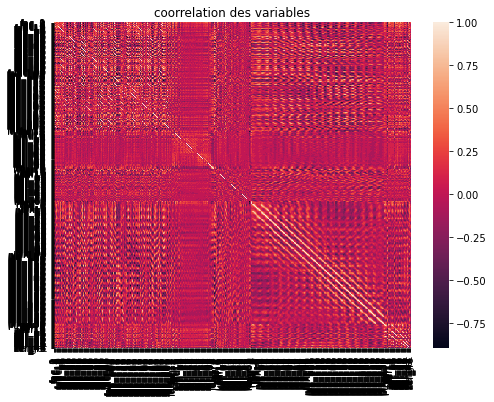

In [66]:
plt.figure(figsize=(8,6))
plt.title('coorrelation des variables')
sn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns)
plt.show()

On constate que les variables sont faiblement correlées. 

## `Dévéloppement des Modèles`

###   Construction des données d'apprentissage.

In [67]:
X=data_scaling.iloc[:,:data_scaling.shape[1]-1]
Y=data_scaling['Target']

#### Récupération de  X et Y pour chaque classe 

In [68]:
n=0
m=200
x=[]
for i in range(10):
    if m<=2000:
        x.append(X.iloc[n:m,:])
        
    n+=200
    m+=200
#-------------------------------
n=0
m=200
y=[]
for i in range(10):
    if m<=2000:
        y.append(Y.iloc[n:m])      
    n+=200
    m+=200

#### Creation des trainingset et Testset

In [72]:
x_train=[];y_train=[];x_test=[];y_test=[]
#-----------------------------------------

for i in range(10):
    p=train_test_split(x[i],y[i],test_size=0.3, random_state=42)
    x_train.append(p[0])
    x_test.append(p[1])
    y_train.append(p[2])
    y_test.append(p[3])

#---------------------------------------------
X_train=pd.concat(x_train)
Y_train=pd.concat(y_train)
X_test=pd.concat(x_test)
Y_test=pd.concat(y_test)

# ----------------------------------------------------------------------
X_val_train = [];X_val_test=[];Y_val_train=[]; Y_val_test=[]
#-----------------------------------------

for i in range(10):
    p=train_test_split(x[i],y[i],test_size=0.2, random_state=42)
    X_val_train.append(p[0])
    X_val_test.append(p[1])
    Y_val_train.append(p[2])
    Y_val_test.append(p[3])

Nous récuperons dans chaque classe un échatillon des données d'entrainement (70%) et de données test (30%), pour que toutes les classes puissent être représentées dans le training et test 

### Construction des Modèles

In [23]:
from sklearn.ensemble import VotingClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model_1 = DecisionTreeClassifier(random_state=0)
model_2 = KNeighborsClassifier(n_neighbors=2)
model_3 = LogisticRegression()

    
model = VotingClassifier([('Tree', model_1), ('KNN',model_2), ('RL', model_3)],voting = 'hard')

for model in (model_1, model_2, model_3, model) : 
    model.fit(X_train, Y_train)
    print(model.__class__.__name__, model.score(X_test,Y_test))


DecisionTreeClassifier 0.9216666666666666
KNeighborsClassifier 0.9683333333333334
LogisticRegression 0.9816666666666667
VotingClassifier 0.985


Nous avons appliqué un classifieur ensembliste qui aggrège les resultats des trois modèles par la technique de vote majoritaire. En observant le score sur l'entrainement des modèles, de manière separée, l'arbre de décision a donné un score de 92,16%, le KNeighborsclassifie 96,83%  et la regression logistique 98,16% et le votingclassiffier 98,5%.

#### Phase de prédiction

In [26]:
# Prédiction sur les données des test
prediction = model.predict(X_test)
prediction

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 7., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 0., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

#### Matrice de Confusion du modèle

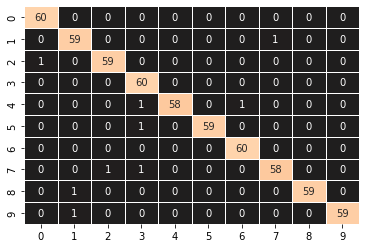

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        60
         1.0       0.97      0.98      0.98        60
         2.0       0.98      0.98      0.98        60
         3.0       0.95      1.00      0.98        60
         4.0       1.00      0.97      0.98        60
         5.0       1.00      0.98      0.99        60
         6.0       0.98      1.00      0.99        60
         7.0       0.98      0.97      0.97        60
         8.0       1.00      0.98      0.99        60
         9.0       1.00      0.98      0.99        60

    accuracy                           0.98       600
   macro avg       0.99      0.98      0.99       600
weighted avg       0.99      0.98      0.99       600



In [27]:
cm=confusion_matrix(Y_test, model.predict(X_test))
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,center=0, linewidths=.5,cbar=False)
plt.show()    
print(classification_report(Y_test, prediction))

#### Observation de la prédiction sur les classes réeels

In [28]:
obs=pd.concat([pd.DataFrame(Y_test.values),pd.DataFrame(prediction)],axis=1)
obs.columns={"True","Predict"}
obs

,True,Predict
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
595,9.0,9.0
596,9.0,9.0
597,9.0,9.0
598,9.0,9.0


<AxesSubplot:ylabel='Density'>

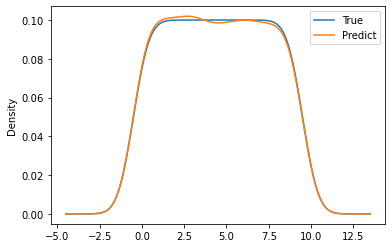

In [29]:
obs.plot.density()

Nous observons que la courbe de la prediction sur les classes de test suit la courbe des données des classes réelles de test, ce qui prouve que le modèle fait une bonne prédiction des classes, d'où il est perfomant 

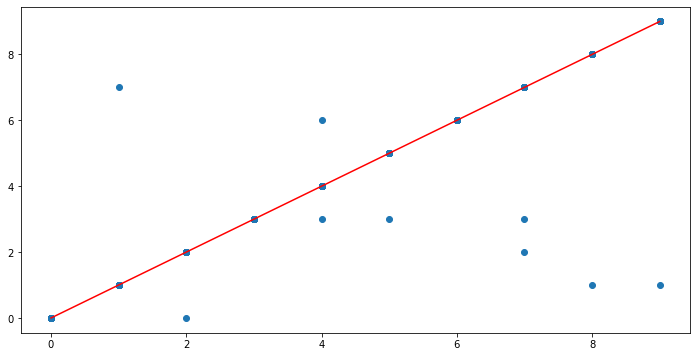

In [30]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test, prediction)
plt.plot(prediction,prediction, 'r')

Dans ce graphe, nous observations visiblement les 9 chiffres qui ont été mal prédits, donc sur l'ensemble de 400 chiffres, le taux d'erreur se mesure à 1,75 %, on peut donc faire confiance à notre modèle.

### Random Forest

In [187]:
from sklearn.ensemble import RandomForestClassifier

In [188]:
model1=RandomForestClassifier()
model1.fit(X_train,Y_train)
pred=model1.predict(X_test)
accuracy_score(Y_test,pred)

0.9816666666666667

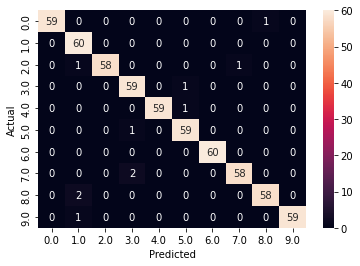

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        60
         1.0       0.94      1.00      0.97        60
         2.0       1.00      0.97      0.98        60
         3.0       0.95      0.98      0.97        60
         4.0       1.00      0.98      0.99        60
         5.0       0.97      0.98      0.98        60
         6.0       1.00      1.00      1.00        60
         7.0       0.98      0.97      0.97        60
         8.0       0.98      0.97      0.97        60
         9.0       1.00      0.98      0.99        60

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



In [190]:
#plot confusion matrix
results = {'y_Actual':Y_test, 'y_Predicted':pred}
df_results = pd.DataFrame(results, columns=['y_Actual','y_Predicted'])
matrix = pd.crosstab(df_results['y_Actual'], df_results['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(matrix, annot=True, fmt='d')
plt.show()
#print classification report
print(classification_report(Y_test, pred))

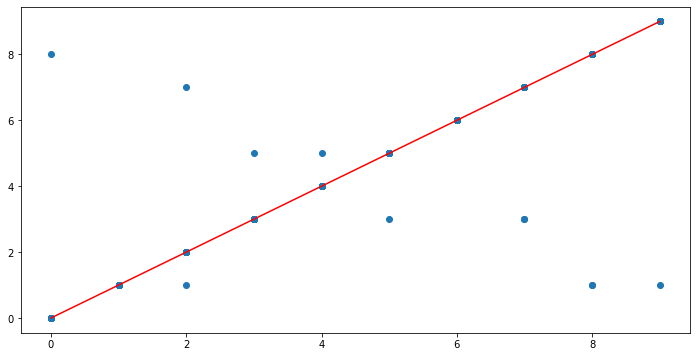

In [192]:
plt.figure(figsize=(12,6))
plt.scatter(Y_test, pred)
plt.plot(pred,pred, 'r')

#### Réseaux des neurones

In [149]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, losses

In [170]:
network=keras.Sequential()
network.add(layers.Dense(40,activation = 'relu', input_shape=(649,))) 
network.add(layers.Dense(40,activation = 'relu'))   # couche cachée
network.add(layers.Dense(10,activation = 'sigmoid'))   

In [183]:
network.compile(optimizer='adam',                # mise à jour des poids de connection
               loss="sparse_categorical_crossentropy",
               metrics=['accuracy'])
hist= network.fit(X_train, Y_train, batch_size=4, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
350/350 [==============================] - 3s 8ms/step - loss: 1.7728e-05 - accuracy: 1.0000 - val_loss: 0.2298 - val_accuracy: 0.9767
Epoch 2/5
350/350 [==============================] - 2s 7ms/step - loss: 9.6288e-07 - accuracy: 1.0000 - val_loss: 0.2118 - val_accuracy: 0.9750
Epoch 3/5
350/350 [==============================] - 3s 8ms/step - loss: 4.6191e-08 - accuracy: 1.0000 - val_loss: 0.1925 - val_accuracy: 0.9750
Epoch 4/5
350/350 [==============================] - 3s 9ms/step - loss: 5.8113e-08 - accuracy: 1.0000 - val_loss: 0.1965 - val_accuracy: 0.9783
Epoch 5/5
350/350 [==============================] - 3s 8ms/step - loss: 5.3943e-09 - accuracy: 1.0000 - val_loss: 0.1957 - val_accuracy: 0.9783


In [175]:
loss, score=network.evaluate(X_test,Y_test)
print('score:', score)

19/19 [==============================] - 0s 7ms/step - loss: 0.1205 - accuracy: 0.9850
score: 0.9850000143051147
